In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#Import the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Speed Dating Data Key.doc
Speed Dating Data.csv



In [0]:
%matplotlib inline
warnings.simplefilter('ignore')

In [0]:
df = pd.read_csv('../input/Speed Dating Data.csv', encoding="ISO-8859-1")

In [0]:
# Overview of the dataset
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

    ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
3       NaN     NaN     NaN  
4       NaN     NaN     NaN  

[5 rows x 195 columns]

In [0]:
df.shape

(8378, 195)

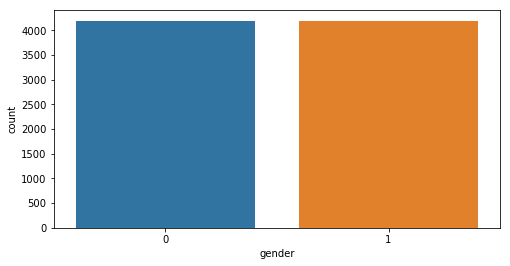

In [0]:
# Simple check to see if the number of men and women are equivalent
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=df)

In [0]:
# Almost the same number of men and women, ok
# Lets start understanding what people look for in a partner; men vs women
atributes_gender = df[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols

In [0]:
trace1 = go.Bar(
    y=list(atributes_gender.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

In [0]:
# Men's are mostly looking for attractive woman, while women are looking for a well rounded man
# Now let's take a look on 'What do you think the opposite sex looks for on a date?'
atributes_gender_2 = df[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
atributes_gender_2.columns = cols

In [0]:
trace1 = go.Bar(
    y=list(atributes_gender_2.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender_2.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='What People Think the Opposite Sex is Looking For',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

In [0]:
# Most of Women know that men's are looking for attractive a woman
# Now let's take a look in what people think about themselves vs How they think other people see them
own_rating = df[['attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].mean()
others_rating = df[['attr5_1', 'sinc5_1','intel5_1','fun5_1','amb5_1']].mean()

In [0]:
trace1 = go.Bar(
    y=list(own_rating),
    x=cols[:-1],
    name='SELF',
    marker=dict(
        color='lightblue'
    )
)
trace2 = go.Bar(
    y=list(others_rating),
    x=cols[:-1],
    name='OTHERS',
    marker=dict(
        color='darkgrey'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Self-evaluation',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

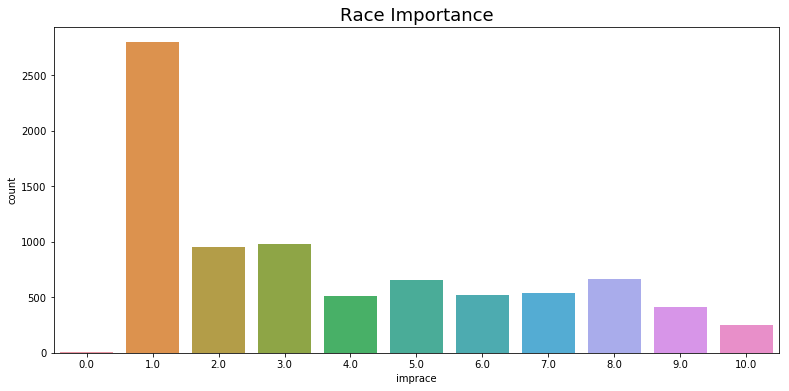

In [0]:
# Not so different
# Let's take a look 'imprace' (Importance to share the same racial/ethnic background?)
plt.figure(figsize=(13,6))
plt.title('Race Importance', fontsize=18)
sns.countplot(df['imprace'])

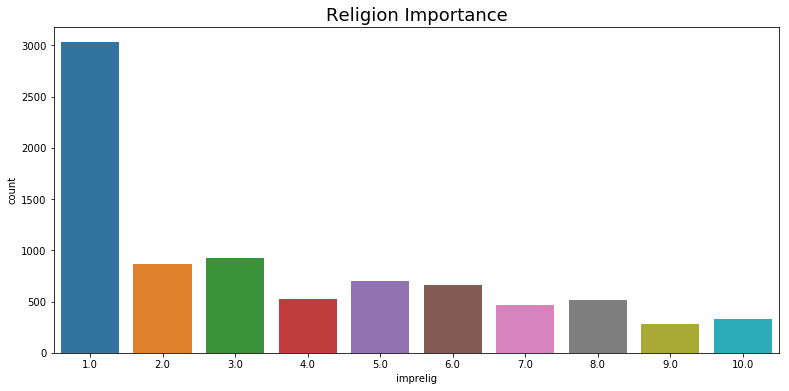

In [0]:
# Beeing the same racial/ethnic background doesn't mean much when choosing a date.
# Lets see if having the same religion is important
plt.figure(figsize=(13,6))
plt.title('Religion Importance', fontsize=18)
sns.countplot(df['imprelig'])

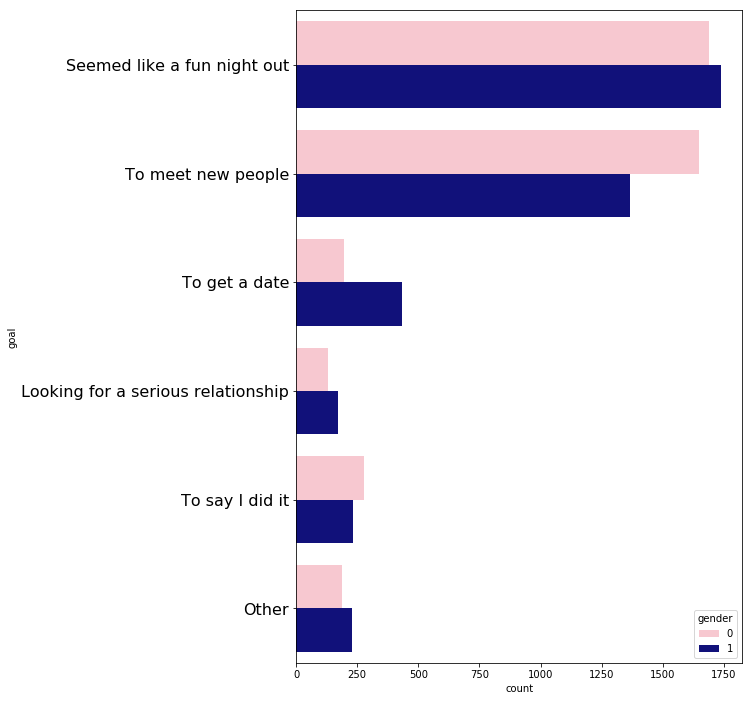

In [0]:
# Goal Men vs Women
goals = ['Seemed like a fun night out','To meet new people','To get a date'
        ,'Looking for a serious relationship','To say I did it','Other']
plt.figure(figsize=(8,12))
sn = sns.countplot(y='goal',data=df, hue='gender', palette=['pink','darkblue'])
sn.set(yticklabels=goals)
sn.set
sn = plt.yticks(rotation=0,fontsize=16)

In [0]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = df.groupby(['gender']).mean()[activities_interested].values

In [0]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,:],
    name='Women',
    #orientation = 'h',
    marker=dict(
        color='pink'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,:],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='darkblue'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Interest by activities Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')